# **Loading Stock Data**

In [19]:
from datetime import datetime, timedelta
import yfinance as yf

end_date = datetime.now()
start_date = datetime.now() - timedelta(days = 365 // 2)

ticker_symbols = ['TCS.NS', 'TATAMOTORS.NS', 'INFY.NS', 'ASIANPAINT.NS', 'ONGC.NS']
stock_idx = 0

stock_data = yf.download(ticker_symbols[stock_idx], start=start_date, end=end_date)

stock_data






[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['TCS.NS']: ConnectionError(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')))


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [20]:
from datetime import date
import calendar


today = date.today()
months_back = 6


# Calculate the starting month by subtracting the desired months from today's month
year_offset = months_back // 12
month_offset = months_back % 12
start_month = today.month - month_offset
start_year = today.year - year_offset
if start_month <= 0:
    start_month += 12
    start_year -= 1


# Create the start date object with the 1st day of the calculated month and year
start_date = date(start_year, start_month, 1)


# Calculate the end date by going back exactly 6 months from today
end_year = today.year
end_month = today.month - 1
if end_month <= 0:
    end_month += 12
    end_year -= 1
_, end_day = calendar.monthrange(end_year, end_month)
end_date = date(end_year, end_month, end_day)

print(f"Start Date: {start_date}")
print(f"End Date: {end_date}")


Start Date: 2023-11-01
End Date: 2024-04-30


In [21]:
%pip install yfinance

^C
Note: you may need to restart the kernel to use updated packages.


[*********************100%%**********************]  1 of 1 completed
C:\Users\user\AppData\Local\Temp\ipykernel_2072\3711409372.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Adj Close': 'Close'}, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_2072\3711409372.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMA_10'] = data['Close'].rolling(window=10).mean()
C:\Users\user\AppData\Local\Temp\ipykernel_2072\3711409372.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

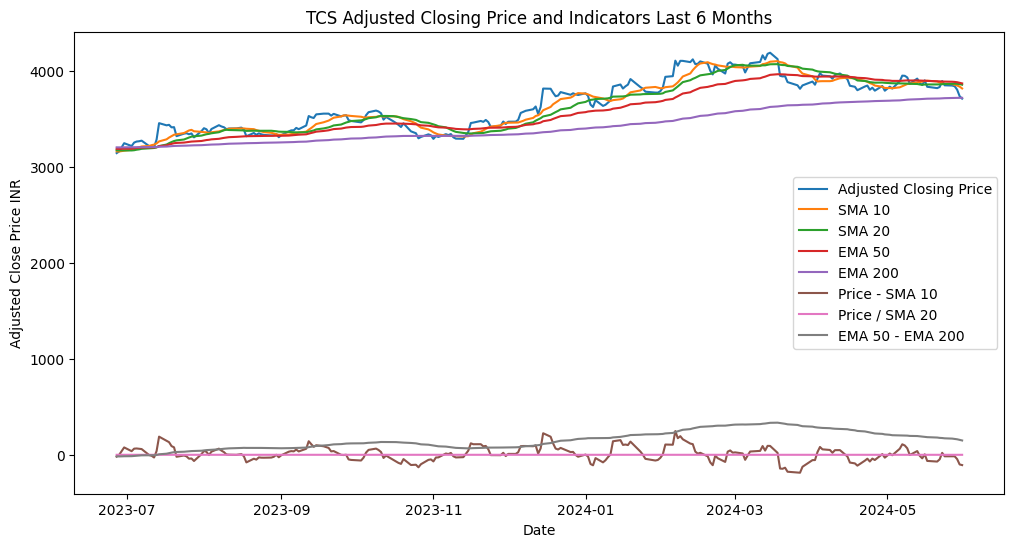

In [37]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Download TCS stock data for the last 6 months
stock_idx = 0
stock_list = ["TCS", "Tata_Motors", "Infosys", "Asian_Paints", "ONGC"]

ticker = ['TCS.NS', 'TATAMOTORS.NS', 'INFY.NS', 'ASIANPAINT.NS', 'ONGC.NS']
# data = yf.download(ticker[stock_idx], period='6mo', interval='1d')
data = yf.download(ticker[stock_idx], period='1y', interval='1d')

# Use the adjusted closing price
data = data[['Adj Close']]
data.rename(columns={'Adj Close': 'Close'}, inplace=True)

# Calculate simple moving averages and exponential moving averages
data['SMA_10'] = data['Close'].rolling(window=10).mean()
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()
data['EMA_200'] = data['Close'].ewm(span=200, adjust=False).mean()


# Create additional features
data['PRICE_SMA_10'] = data['Close'] - data['SMA_10']
data['PRICE_SMA_20_Ratio'] = data['Close'] / data['SMA_20']
data['EMA_DIFF'] = data['EMA_50'] - data['EMA_200']

data = data.dropna()

# Plot the adjusted closing price
# Plot the adjusted closing price and indicators
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Adjusted Closing Price')
plt.plot(data['SMA_10'], label='SMA 10')
plt.plot(data['SMA_20'], label='SMA 20')
plt.plot(data['EMA_50'], label='EMA 50')
plt.plot(data['EMA_200'], label='EMA 200')
plt.plot(data['PRICE_SMA_10'], label='Price - SMA 10')
plt.plot(data['PRICE_SMA_20_Ratio'], label='Price / SMA 20')
plt.plot(data['EMA_DIFF'], label='EMA 50 - EMA 200')

plt.title('TCS Adjusted Closing Price and Indicators Last 6 Months')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price INR')
plt.legend()
plt.show()



In [38]:
# combine DataFrame
sentiment_data = pd.read_csv(rf'../Dataset/{stock_list[stock_idx]}_sentiment_data.csv')
sentiment_data['Date'] = pd.to_datetime(sentiment_data['Date'])
sentiment_data.set_index('Date', inplace=True)

# Combine with the adjusted closing price data
combined_df = data.join(sentiment_data, how='left')

# Fill any missing sentiment scores (if necessary) - for example, with 0 for neutrality
combined_df.fillna({'Label': 0}, inplace=True)

print(combined_df.head())
# combined_df.to_csv('combined_data.csv')



                  Close       SMA_10       SMA_20       EMA_50      EMA_200  \
Date                                                                          
2023-06-27  3143.309814  3161.290625  3173.781287  3187.948225  3203.273968   
2023-06-28  3161.103516  3160.150195  3171.335010  3186.895491  3202.854361   
2023-06-30  3246.437012  3168.599951  3171.472095  3189.230453  3203.288020   
2023-07-03  3216.992920  3178.175317  3171.034741  3190.319177  3203.424387   
2023-07-04  3252.925293  3187.853955  3173.208850  3192.774319  3203.916933   

            PRICE_SMA_10  PRICE_SMA_20_Ratio   EMA_DIFF  Label  
Date                                                            
2023-06-27    -17.980811            0.990399 -15.325743    0.0  
2023-06-28      0.953320            0.996774 -15.958870    0.0  
2023-06-30     77.837061            1.023637 -14.057567    0.0  
2023-07-03     38.817603            1.014493 -13.105210    0.0  
2023-07-04     65.071338            1.025122 -11.142614 

In [3]:
combined_df.shape

(475, 9)

In [39]:
from sklearn.preprocessing import MinMaxScaler

# Select features and target variable
combined_df['Shifted_Label'] = combined_df['Label'].shift(5)
features = combined_df[['Close', 'Label', 'SMA_10', 'SMA_20', 'EMA_50', 'EMA_200', 'PRICE_SMA_10', 'PRICE_SMA_20_Ratio', 'EMA_DIFF', 'Shifted_Label']]
target = combined_df['Close']

# Scale the features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# Function to create dataset for LSTM
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), :]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

def window_slice(data, window_size, step=1):
    X, y = [], []
    for i in range(0, len(data) - window_size, step):
        X.append(data[i:i+window_size, :-1])
        y.append(data[i+window_size-1, -1])
    return np.array(X), np.array(y)

# window_size = 30  
# augmented_X, augmented_y = window_slice(scaled_features, window_size)

time_step = 60

X, y = create_dataset(scaled_features, time_step)

# Split the data into training and test sets (80/20 split)
train_size = int(len(X) * 0.8)
# X_train, X_test = augmented_X[:train_size], augmented_X[train_size:]
# y_train, y_test = augmented_y[:train_size], augmented_y[train_size:]
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [40]:
X_train.shape[2]

10

In [41]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1_l2

def create_model(units=50, dropout=0.2, lr=0.001):
 # Define the model architecture
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(time_step, X.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=True, kernel_regularizer=l1_l2(l1=0.01, l2=0.01), input_shape=(time_step, X.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Define early stopping callback
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model with early stopping
    # history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
    #                     epochs=200, batch_size=32)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=200, batch_size=32, callbacks=[early_stop])
    return model

model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the hyperparameters to tune
units = [32, 64, 128]
dropout = [0.1, 0.2, 0.3]
lr = [0.001, 0.01, 0.1]
param_grid = dict(units=units, dropout=dropout, lr=lr)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Print the best score and parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Note: you may need to restart the kernel to use updated packages.


ValueError: Invalid parameter dropout for estimator KerasRegressor.
This issue can likely be resolved by setting this parameter in the KerasRegressor constructor:
`KerasRegressor(dropout=0.1)`
Check the list of available parameters with `estimator.get_params().keys()`

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, LSTM, Dropout

# # Build the LSTM model
# model = Sequential()

# model.add(LSTM(50, return_sequences=True, input_shape=(time_step, X.shape[2])))
# model.add(Dropout(0.2))
# model.add(LSTM(50, return_sequences=False))
# model.add(Dropout(0.2))
# model.add(Dense(25))
# model.add(Dense(1))


# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Train the model
# model.fit(X_train, y_train, batch_size=32, epochs=100)

# model = Sequential()
# model.add(LSTM(64, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
# model.add(LSTM(64, return_sequences=False))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1))

# # Compile and train the model
# model.compile(optimizer='adam', loss='mse')
# model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))



In [ ]:
# # Testing the model using GRU

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.regularizers import l2

# # Define the model architecture
# model = Sequential()
# model.add(GRU(100, return_sequences=True, input_shape=(time_step, X.shape[2])))  # Use GRU instead of LSTM
# model.add(Dropout(0.4))  # Increase dropout rate
# model.add(GRU(100, return_sequences=False))  # Use GRU instead of LSTM
# model.add(Dropout(0.4))  # Increase dropout rate
# model.add(Dense(100, activation='relu', kernel_regularizer=l2(0.01)))  # Increase units in Dense layer
# model.add(Dense(1))

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Define early stopping callback
# early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)  # Increase patience

# # Train the model with early stopping
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
#                     epochs=300, batch_size=64, callbacks=[early_stop])  # Increase epochs

# # Evaluate the model
# train_loss = model.evaluate(X_train, y_train, verbose=0)
# test_loss = model.evaluate(X_test, y_test, verbose=0)

# print("Training Loss:", train_loss)
# print("Testing Loss:", test_loss)

In [42]:
# testing using grid search for hyperparameter tuning
%pip install keras
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Function to create model, required for KerasRegressor
def create_model(neurons=1):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(time_step, X.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a regressor with Keras
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the grid search parameters
neurons = [50, 100, 150]
batch_size = [10, 20, 40, 60, 80, 100]
param_grid = dict(neurons=neurons, batch_size=batch_size)

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Note: you may need to restart the kernel to use updated packages.


ModuleNotFoundError: No module named 'keras.wrappers'

In [41]:
# Testing the model using LSTM and GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# Define the model architecture
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(time_step, X.shape[2])))  # LSTM layer
model.add(Dropout(0.3))  # Dropout layer
model.add(GRU(100, return_sequences=False))  # GRU layer
model.add(Dropout(0.3))  # Dropout layer
model.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01)))  # Dense layer with L2 regularization
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=250, batch_size=64, callbacks=[early_stop])

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

print("Training Loss:", train_loss)
print("Testing Loss:", test_loss)

f:\Projects\Stock Preditction\src\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 781ms/step - loss: nan - val_loss: nan
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - loss: nan - val_loss: nan
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 283ms/step - loss: nan - val_loss: nan
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step - loss: nan - val_loss: nan
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - loss: nan - val_loss: nan
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - loss: nan - val_loss: nan
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - loss: nan - val_loss: nan
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step - loss: nan - val_loss: nan
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - loss: nan - val_loss: nan
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - loss: nan - val_loss: nan
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - loss: nan - val_loss: nan
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - loss: nan - val_loss: nan
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/s

In [42]:
# current best model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Assuming X_train and X_test are numpy arrays
X_train = X_train.reshape((X_train.shape[0], time_step, X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], time_step, X_test.shape[2]))

# Define the model architecture
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=200, batch_size=32)
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
#                     epochs=200, batch_size=32, callbacks=[early_stop])

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

print("Training Loss:", train_loss)
print("Testing Loss:", test_loss)


Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 325ms/step - loss: 0.3667 - val_loss: 0.4651
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.3391 - val_loss: 0.4584
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - loss: 0.3364 - val_loss: 0.4516
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - loss: 0.3387 - val_loss: 0.4449
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.3440 - val_loss: 0.4383
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.3302 - val_loss: 0.4318
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.3229 - val_loss: 0.4254
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.3421 - val_loss: 0.4191
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.3126 - val_loss: 0.4129
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.3002 - val_loss: 0.4067
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - loss: 0.3027 - val_loss: 0.4004
Epoch 12/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.2

In [ ]:
# test
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.regularizers import l1_l2


# Define the model architecture
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True, kernel_regularizer=l1_l2(l1=0.01, l2=0.01), input_shape=(time_step, X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
#                     epochs=200, batch_size=32)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=200, batch_size=32, callbacks=[early_stop])

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

print("Training Loss:", train_loss)
print("Testing Loss:", test_loss)


In [ ]:
# test 1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# Define learning rate schedule
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.9

# Define the model architecture
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, X.shape[2]), activity_regularizer=l1(0.0001)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False, activity_regularizer=l1(0.0001)))
model.add(Dropout(0.2))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Define learning rate scheduler callback
lr_scheduler = LearningRateScheduler(scheduler)

# Train the model with early stopping and learning rate scheduler
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=200, batch_size=32, callbacks=[early_stop, lr_scheduler])

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

print("Training Loss:", train_loss)
print("Testing Loss:", test_loss)

f:\Projects\Stock Preditction\src\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - loss: 1.4688 - val_loss: 0.4984 - learning_rate: 0.0010
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - loss: 1.2684 - val_loss: 0.4300 - learning_rate: 0.0010
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - loss: 1.1347 - val_loss: 0.3765 - learning_rate: 0.0010
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step - loss: 1.0337 - val_loss: 0.3334 - learning_rate: 0.0010
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step - loss: 0.9504 - val_loss: 0.2981 - learning_rate: 0.0010
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - loss: 0.8844 - val_loss: 0.2700 - learning_rate: 0.0010
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - loss: 0.8186 - val_loss: 0.2485 - learning_rate: 0.0010
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - loss: 0.7807 - val_loss: 0.2324 - learning_rate: 0.0010
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - loss: 0.7368 - val_loss: 0.2208 - learning_rate: 0.0010
Epoch 10/200
1/1 ━━━

In [8]:
# test 2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Define the model architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(time_step, X.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=200, batch_size=32)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

print("Training Loss:", train_loss)
print("Testing Loss:", test_loss)

f:\Projects\Stock Preditction\src\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "conv1d" is incompatible with the layer: expected axis -1 of input shape to have value 10, but received input with shape (None, 30, 9)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 30, 9), dtype=float32)
  • training=True
  • mask=None

In [ ]:
# test 3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Define the model architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(time_step, X.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(10, return_sequences=False))  # Small LSTM layer
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=200, batch_size=32)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

print("Training Loss:", train_loss)
print("Testing Loss:", test_loss)

f:\Projects\Stock Preditction\src\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 0.2733 - val_loss: 0.1738
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - loss: 0.2282 - val_loss: 0.1394
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - loss: 0.1892 - val_loss: 0.1107
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - loss: 0.1560 - val_loss: 0.0904
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - loss: 0.1277 - val_loss: 0.0745
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - loss: 0.1051 - val_loss: 0.0598
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - loss: 0.0855 - val_loss: 0.0456
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - loss: 0.0687 - val_loss: 0.0333
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - loss: 0.0540 - val_loss: 0.0228
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - loss: 0.0405 - val_loss: 0.0143
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - loss: 0.0292 - val_loss: 0.0079
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - loss: 0.0206

In [43]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 60, 50)         │        12,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,105 (394.95 KB)

 Trainable params: 33,701 (131.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 67,404 (263.30 KB)

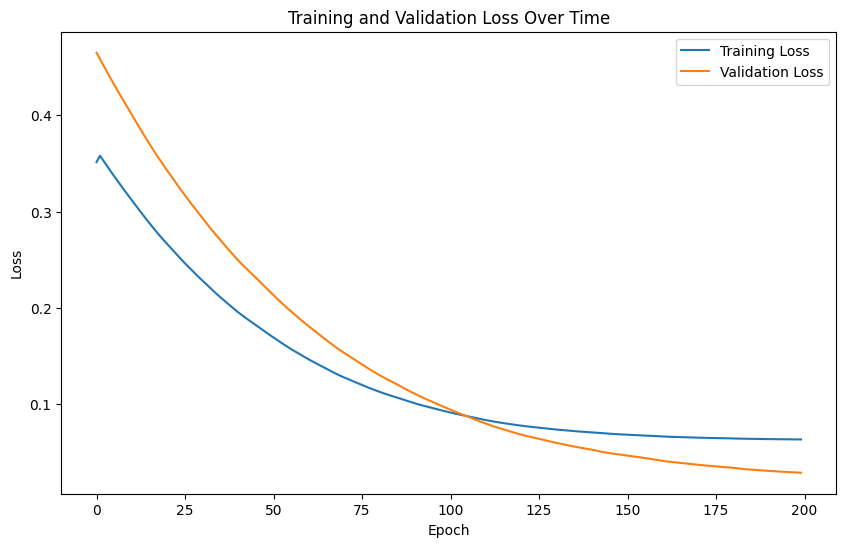

In [44]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Time')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step 


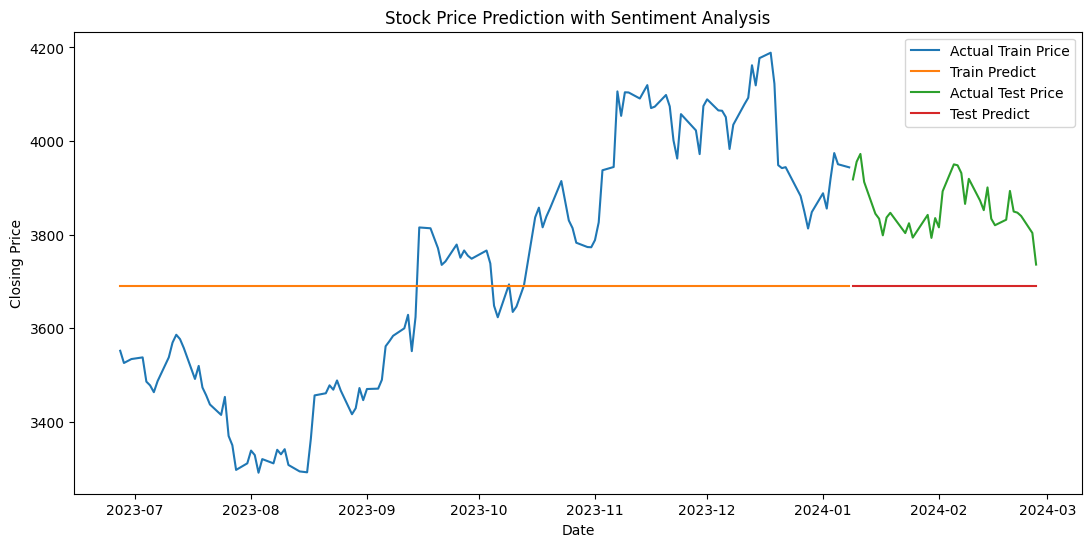

Train MAE: 231.35525908510823
Train MSE: 69109.72891790613
Train RMSE: 262.8872931845625
Train R2: -0.01107331901423425

Test MAE: 168.4877913618479
Test MSE: 31345.903521055152
Test RMSE: 177.04774362034425
Test R2: -9.59782473808401


In [45]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Make predictions on the training and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Reshape the predictions to fit the scaler's expectations
train_predict = train_predict.reshape(-1, 1)
test_predict = test_predict.reshape(-1, 1)

# Invert scaling to get actual values
train_predict_inverse = scaler.inverse_transform(np.concatenate((train_predict, np.zeros((train_predict.shape[0], X_train.shape[2]-1))), axis=1))[:, 0]
test_predict_inverse = scaler.inverse_transform(np.concatenate((test_predict, np.zeros((test_predict.shape[0], X_test.shape[2]-1))), axis=1))[:, 0]

# Invert scaling for actual values as well
y_train_inverse = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], X_train.shape[2]-1))), axis=1))[:, 0]
y_test_inverse = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], X_test.shape[2]-1))), axis=1))[:, 0]

# Plot the results
plt.figure(figsize=(13, 6))
plt.plot(combined_df.index[:len(y_train_inverse)], y_train_inverse, label='Actual Train Price')
plt.plot(combined_df.index[:len(train_predict_inverse)], train_predict_inverse, label='Train Predict')
plt.plot(combined_df.index[len(y_train_inverse):len(y_train_inverse) + len(y_test_inverse)], y_test_inverse, label='Actual Test Price')
plt.plot(combined_df.index[len(y_train_inverse):len(y_train_inverse) + len(test_predict_inverse)], test_predict_inverse, label='Test Predict')
plt.title('Stock Price Prediction with Sentiment Analysis')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Calculate evaluation metrics
train_mae = mean_absolute_error(y_train_inverse, train_predict_inverse)
train_mse = mean_squared_error(y_train_inverse, train_predict_inverse)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_inverse, train_predict_inverse)

test_mae = mean_absolute_error(y_test_inverse, test_predict_inverse)
test_mse = mean_squared_error(y_test_inverse, test_predict_inverse)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_inverse, test_predict_inverse)

print(f'Train MAE: {train_mae}')
print(f'Train MSE: {train_mse}')
print(f'Train RMSE: {train_rmse}')
print(f'Train R2: {train_r2}')

print(f'\nTest MAE: {test_mae}')
print(f'Test MSE: {test_mse}')
print(f'Test RMSE: {test_rmse}')
print(f'Test R2: {test_r2}')


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Training Metrics:
MAE: 231.35525908510823
MSE: 69109.72891790613
RMSE: 262.8872931845625
R²: -0.01107331901423425

Testing Metrics:
MAE: 168.4877913618479
MSE: 31345.903521055152
RMSE: 177.04774362034425
R²: -9.59782473808401


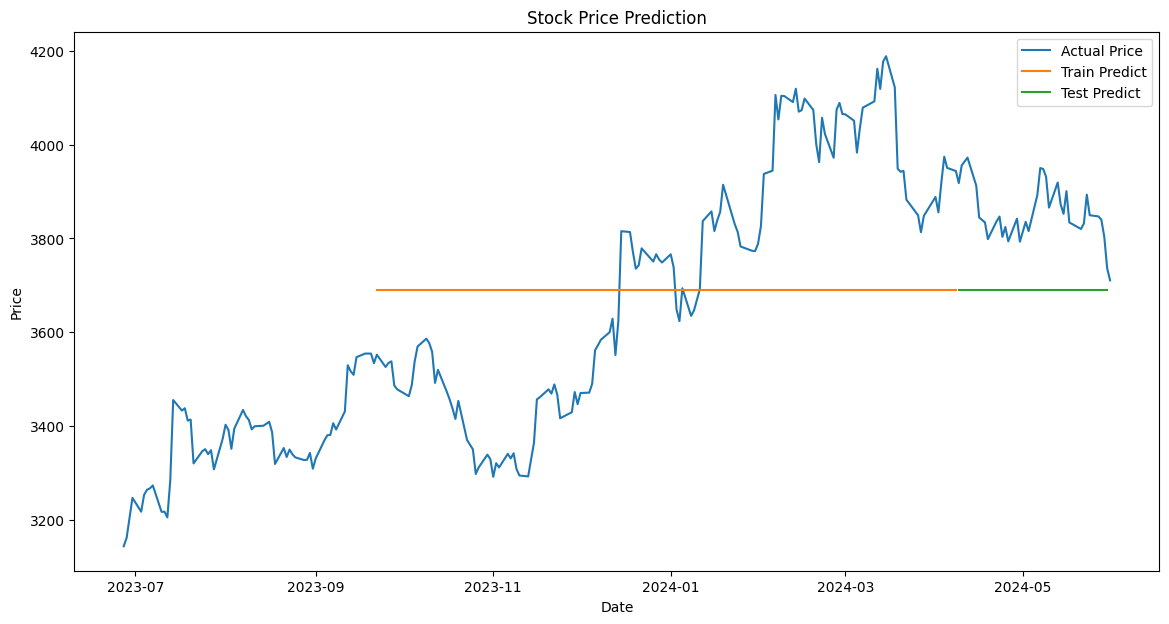

In [46]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming your data and model are already defined and trained

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(np.concatenate((train_predict, np.zeros((train_predict.shape[0], X_train.shape[2] - 1))), axis=1))[:, 0]
test_predict = scaler.inverse_transform(np.concatenate((test_predict, np.zeros((test_predict.shape[0], X_test.shape[2] - 1))), axis=1))[:, 0]

# Inverse transform the actual values
y_train_actual = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], X_train.shape[2] - 1))), axis=1))[:, 0]
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], X_test.shape[2] - 1))), axis=1))[:, 0]

# Calculate metrics for training set
train_mae = mean_absolute_error(y_train_actual, train_predict)
train_mse = mean_squared_error(y_train_actual, train_predict)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_actual, train_predict)

# Calculate metrics for testing set
if len(y_test_actual) > 1:
    test_mae = mean_absolute_error(y_test_actual, test_predict)
    test_mse = mean_squared_error(y_test_actual, test_predict)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test_actual, test_predict)
else:
    test_mae = test_mse = test_rmse = test_r2 = np.nan

print(f'Training Metrics:')
print(f'MAE: {train_mae}')
print(f'MSE: {train_mse}')
print(f'RMSE: {train_rmse}')
print(f'R²: {train_r2}')

print(f'\nTesting Metrics:')
print(f'MAE: {test_mae}')
print(f'MSE: {test_mse}')
print(f'RMSE: {test_rmse}')
print(f'R²: {test_r2}')

# Ensure the indices for plotting match the lengths of the predictions
train_plot_indices = combined_df.index[time_step:time_step + len(train_predict)]
test_plot_indices = combined_df.index[time_step + len(train_predict):time_step + len(train_predict) + len(test_predict)]

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(combined_df.index, combined_df['Close'], label='Actual Price')
plt.plot(train_plot_indices, train_predict, label='Train Predict')
plt.plot(test_plot_indices, test_predict, label='Test Predict')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [47]:
# Predicting the next 30 days
last_days = scaled_features[-time_step:]

num_features = X.shape[2]
predictions = []

current_input = last_days.reshape(1, time_step, num_features)

for i in range(30):
    next_prediction = model.predict(current_input)
    predictions.append(next_prediction[0, 0])
    print(f"step {i+ 1}")

    next_prediction = next_prediction.reshape(1, 1, 1)
    next_prediction_tiled = np.tile(next_prediction, (1, 1, num_features))

    new_input = np.concatenate((current_input[:, 1:, :], next_prediction_tiled), axis=1)
    current_input = new_input

# Invert predictions to get actual values
predictions = np.array(predictions).reshape(-1, 1)
predictions_full = np.concatenate([predictions, np.zeros((predictions.shape[0], num_features - 1))], axis=1)
predictions = scaler.inverse_transform(predictions_full)[:, 0]



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
step 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
step 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
step 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
step 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
step 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
step 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
step 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
step 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
step 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
step 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
step 11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
step 12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
step 13
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
step 14
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
step 15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
step 16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
step 17
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
step 18
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
step 19
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
step 20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
step 21
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
st

3690.884652342196


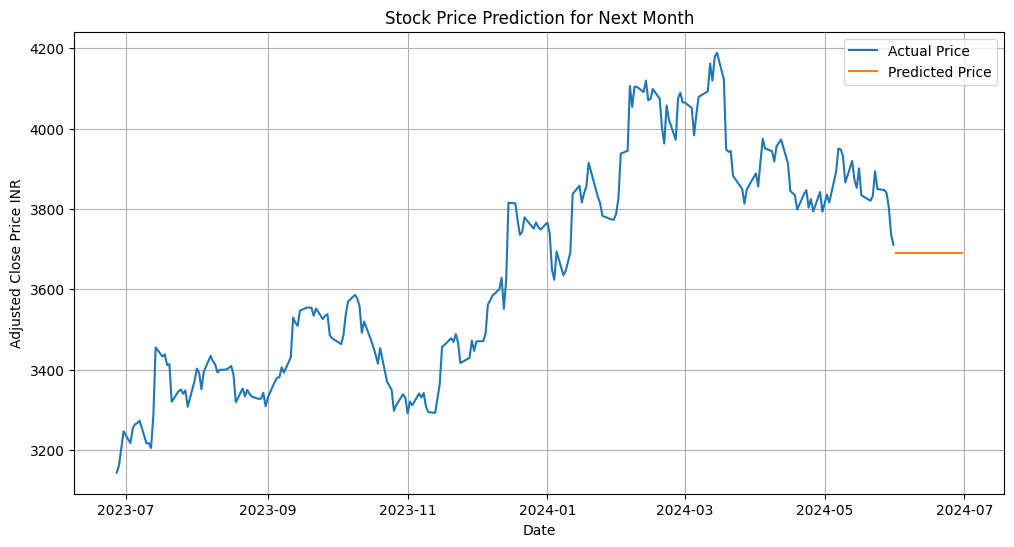

In [48]:
print(predictions.mean())

# Plot the predictions
future_dates = pd.date_range(start=combined_df.index[-1] + pd.Timedelta(days=1), periods=30)
plt.figure(figsize=(12, 6))
plt.plot(combined_df.index, combined_df['Close'], label='Actual Price')
plt.plot(future_dates, predictions, label='Predicted Price')
plt.title('Stock Price Prediction for Next Month')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price INR')
plt.legend()
plt.grid()
plt.show()

# **Tuning the model**

In [49]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import KFold
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# from tensorflow.keras.callbacks import EarlyStopping


# data = combined_df.copy()

# # features and target
# features = data[['Close', 'Label', 'SMA_10', 'SMA_20', 'EMA_50', 'EMA_200']]
# target = data['Close']

# # Scaling of the features and target separately
# feature_scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_features = feature_scaler.fit_transform(features)

# target_scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_target = target_scaler.fit_transform(target.values.reshape(-1, 1))

# # Combine scaled features and target to create the dataset for LSTM
# scaled_data = np.hstack((scaled_target, scaled_features[:, 1:]))

# # Function to create dataset for LSTM
# def create_dataset(dataset, time_step=1):
#     dataX, dataY = [], []
#     for i in range(len(dataset) - time_step - 1):
#         a = dataset[i:(i + time_step), :]
#         dataX.append(a)
#         dataY.append(dataset[i + time_step, 0])
#     return np.array(dataX), np.array(dataY)

# time_step = 60
# X, y = create_dataset(scaled_data, time_step)

# # K-Fold Cross-Validation
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# mae_scores = []
# mse_scores = []
# rmse_scores = []
# r2_scores = []

# for train_index, test_index in kf.split(X):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

#     # Build the LSTM model
#     model = Sequential()
#     model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(time_step, X.shape[2])))
#     model.add(MaxPooling1D(pool_size=2))
#     model.add(Flatten())
#     model.add(Dense(50, activation='relu'))
#     model.add(Dense(1))

#     # Compile the model
#     model.compile(optimizer='adam', loss='mean_squared_error')

#     # Define early stopping callback
#     early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#     # Train the model with early stopping
#     history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
#                         epochs=200, batch_size=32, callbacks=[early_stop])

#     # Evaluate the model
#     predictions = model.predict(X_test)
#     predictions = target_scaler.inverse_transform(predictions)

#     # Inverse transform actual values
#     y_test_scaled = target_scaler.inverse_transform(y_test.reshape(-1, 1))

#     # Calculate performance metrics
#     mae = mean_absolute_error(y_test_scaled, predictions)
#     mse = mean_squared_error(y_test_scaled, predictions)
#     rmse = np.sqrt(mse)
#     r2 = r2_score(y_test_scaled, predictions)

#     mae_scores.append(mae)
#     mse_scores.append(mse)
#     rmse_scores.append(rmse)
#     r2_scores.append(r2)

# # Print average performance metrics
# print(f"Average MAE: {np.mean(mae_scores)}")
# print(f"Average MSE: {np.mean(mse_scores)}")
# print(f"Average RMSE: {np.mean(rmse_scores)}")
# print(f"Average R²: {np.mean(r2_scores)}")
